In [0]:
%load_ext autoreload
%autoreload 2

In [2]:
import os.path
if not os.path.exists('mlp_helper.py'):
    !wget https://github.com/lab-ml-itba/MLP-2019/raw/master/mlp_helper.py

--2019-10-15 18:01:00--  https://github.com/lab-ml-itba/MLP-2019/raw/master/mlp_helper.py
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lab-ml-itba/MLP-2019/master/mlp_helper.py [following]
--2019-10-15 18:01:00--  https://raw.githubusercontent.com/lab-ml-itba/MLP-2019/master/mlp_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13701 (13K) [text/plain]
Saving to: ‘mlp_helper.py’

mlp_helper.py       100%[===================>]  13.38K  --.-KB/s    in 0.007s  

2019-10-15 18:01:00 (1.93 MB/s) - ‘mlp_helper.py’ saved [13701/13701]



In [0]:
from mlp_helper import plot_boundaries_keras, get_dataset, plot_boundaries, draw_neural_net, return_weights_notation, get_dataset_2
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 

# Pruebas a realizar:
- hidden_units en 2 y 3
- Cambiar funcion de activación de la capa oculta: Sigmoid, Relu, Linear

# Dataset

In [0]:
hidden_units = 2

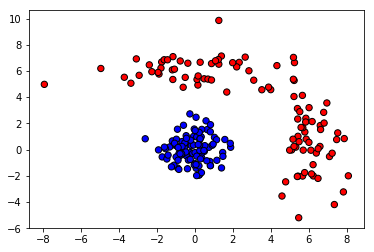

In [5]:
if hidden_units==2:
    X, y = get_dataset()
else:
    X, y = get_dataset_2()
plot_boundaries(X, y)

# Modelo: Red neuronal con 1 capa oculta

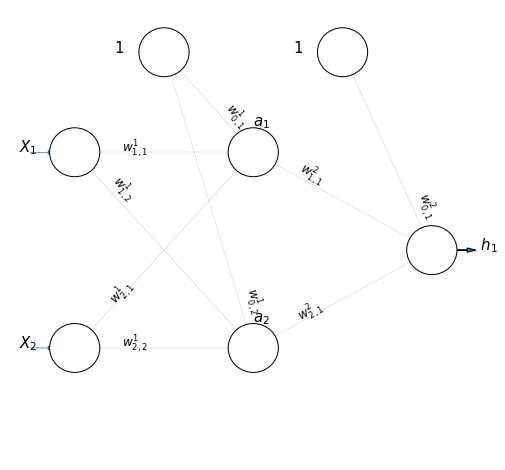

In [6]:
input_dim = 2

fig, ax = plt.subplots(1,1,figsize=(8, 8))
shape = [input_dim,hidden_units,1]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Selección de función de activación
https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [0]:
def plot_act(activ):
    t = np.linspace(-10, 10, 100)
    plt.plot(t, activ(t))
    plt.show()

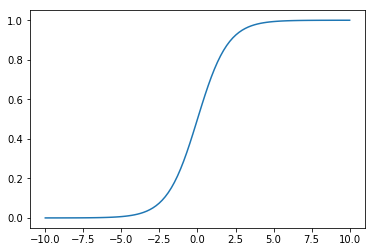

In [10]:
plot_act(sigmoid)

In [0]:
activation = 'sigmoid' # linear, tanh, relu, tanh, sigmoid

In [109]:
model = Sequential() # voy a construir un modelo por capas
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation)) # comienzo a agregar capas al modelo
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.optimizers import Adam, SGD # SGD Stochastic gradient descent, Adam: learning rate adaptativo
model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
model.evaluate(X, y) #evaluate es el score

200/200 [==============================] - 0s 1ms/step


[0.7718703770637512, 0.5]

In [112]:
weights = model.get_weights()
print(weights)

[array([[-0.5856064 ,  0.1722765 ],
       [ 1.0021156 , -0.06601167]], dtype=float32), array([0., 0.], dtype=float32), array([[0.8354045],
       [0.4247117]], dtype=float32), array([0.], dtype=float32)]


In [113]:
weights[0].shape, X[0:1].shape

((2, 2), (1, 2))

In [114]:
weights[1].shape, X[0:1].shape

((2,), (1, 2))

In [115]:
i = 1
sigmoid(np.dot(sigmoid(np.dot(X[i:i+1], weights[0]) + weights[1]), weights[2]) + weights[3])

array([[0.70005573]])

In [116]:
X[i:i+1]

array([[0.64768854, 1.52302986]])

In [117]:
model.predict(X[i:i+1])

array([[0.7000557]], dtype=float32)

In [118]:
model.predict(X[i:i+2])

array([[0.7000557 ],
       [0.64727145]], dtype=float32)

## Para recordar:

- Una red neuronal es la concatenación de capas
- Cada capa hace el producto entre el vector fila de entrada con la matriz de pesos, le suma el bias y luego aplica función de activación

# Entrenamiento

In [122]:
model.fit(X, y, epochs=10, verbose=1, batch_size=32)

Epoch 1/10
200/200 [==============================] - 0s 65us/step - loss: 0.0709 - acc: 0.9950
Epoch 2/10
200/200 [==============================] - 0s 51us/step - loss: 0.0682 - acc: 1.0000
Epoch 3/10
200/200 [==============================] - 0s 56us/step - loss: 0.0646 - acc: 1.0000
Epoch 4/10
200/200 [==============================] - 0s 53us/step - loss: 0.0623 - acc: 0.9950
Epoch 5/10
200/200 [==============================] - 0s 57us/step - loss: 0.0621 - acc: 0.9950
Epoch 6/10
200/200 [==============================] - 0s 56us/step - loss: 0.0574 - acc: 1.0000
Epoch 7/10
200/200 [==============================] - 0s 48us/step - loss: 0.0555 - acc: 1.0000
Epoch 8/10
200/200 [==============================] - 0s 47us/step - loss: 0.0540 - acc: 1.0000
Epoch 9/10
200/200 [==============================] - 0s 51us/step - loss: 0.0537 - acc: 1.0000
Epoch 10/10
200/200 [==============================] - 0s 57us/step - loss: 0.0509 - acc: 1.0000


200/200 [==============================] - 0s 52us/step


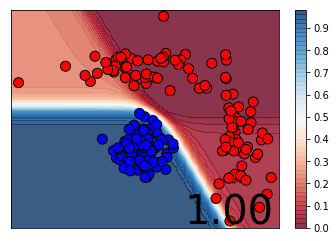

In [123]:
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict_proba, h=0.5)

## Obtenemos pesos de primera capa
### Pesos aprendidos

In [124]:
model.get_weights()

[array([[-4.9844058e-04, -2.4836721e+00],
        [-2.2596784e+00, -1.2700593e+00]], dtype=float32),
 array([6.416931 , 5.8086085], dtype=float32),
 array([[5.020476 ],
        [6.3681536]], dtype=float32),
 array([-7.631418], dtype=float32)]

In [125]:
# Nos quedamos con los pesos de la primer capa
layer_1_w = model.get_weights()[0]
layer_1_b = model.get_weights()[1]
print(layer_1_w)
print(layer_1_b)

[[-4.9844058e-04 -2.4836721e+00]
 [-2.2596784e+00 -1.2700593e+00]]
[6.416931  5.8086085]


In [126]:
# Preparo los pesos a asignar a un "submodelo" de "regresión logistica"
model_1_weights = [np.array([layer_1_w[:,0]]).T, np.array([layer_1_b[0]])]
print(model_1_weights)

[array([[-4.9844058e-04],
       [-2.2596784e+00]], dtype=float32), array([6.416931], dtype=float32)]


In [127]:
# Construimos el submodelo
model_1 = Sequential()
model_1.add(Dense(1, input_shape=(2,), activation=activation))
model_1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Le asginamos los pesos al submodelo
model_1.set_weights(model_1_weights)
model_1.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])

200/200 [==============================] - 0s 1ms/step


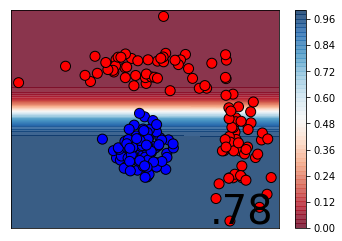

In [129]:
plot_boundaries_keras(X, y, model_1.evaluate(X,y)[1], probability_func=model_1.predict_proba, h=0.5)

### Generalizo función para armar submodelo
Y grafico los dos submodelos

In [0]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return sub_model

### Graficamos las rectas aprendidas por los submodelos

200/200 [==============================] - 0s 2ms/step


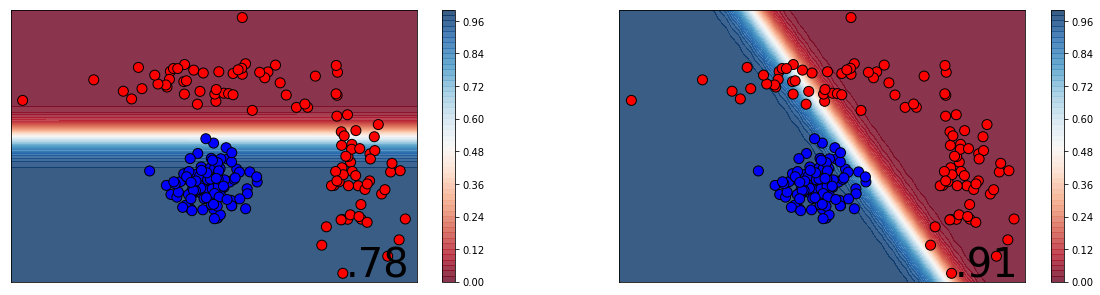

In [131]:
f, ax = plt.subplots(1, hidden_units, figsize=(20,5))
sub_models = []
for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation)
    sub_models.append(sub_model)
    plot_boundaries_keras(X, y, sub_model.evaluate(X,y)[1], probability_func=sub_model.predict_proba, ax=ax[i], h=0.5)

In [71]:
# Notar que en los gráficos se ve que parece estar al reves.
model.get_weights()[2]

array([[-2.0275438],
       [-2.18849  ]], dtype=float32)

In [0]:
# Por eso los pesos del siguiente submodelo (el que combina los dos) son negativos

# Espacio linealmente separable

# Para graficos 3d
conda install -c conda-forge ipympl
# If using JupyterLab
conda install nodejs
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension install jupyter-matplotlib

In [0]:
X_sub_preds = []
for i in range(hidden_units):
    X_sub_preds.append(sub_models[i].predict(X))

In [0]:
# Calculamos la ubicación de las observaciones en el nuevo espacio
new_space = np.hstack(X_sub_preds)

In [75]:
new_space.shape

(200, 2)

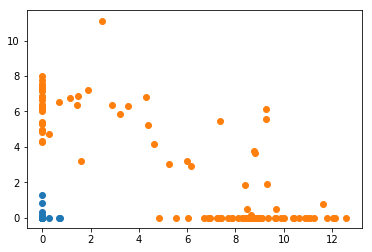

In [76]:
# Graficamos los puntos en el nuevo espacio
if hidden_units == 2:
    plt.scatter(new_space[y==1,0], new_space[y==1,1])
    plt.scatter(new_space[y==0,0], new_space[y==0,1])
    plt.show()
else:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')

In [0]:
# Creo el submodelo de la salida. Lleva sigmoidea por que es ya la predicción
sub_model_3 = get_sub_model(model, 0, 2, 3, activation='sigmoid', input_dim=hidden_units)

In [78]:
sub_model_3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [79]:
weights_3 = sub_model_3.get_weights()
weights_3

[array([[-2.0275438],
        [-2.18849  ]], dtype=float32), array([5.3296013], dtype=float32)]

200/200 [==============================] - 0s 432us/step


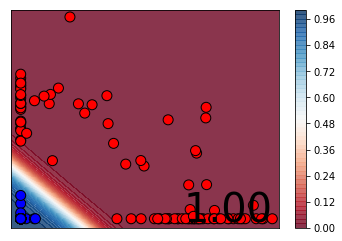

In [80]:
if hidden_units == 2:
    plot_boundaries_keras(new_space, y, sub_model_3.evaluate(new_space,y)[1], probability_func=sub_model_3.predict_proba, h=0.2)
else:
    # %matplotlib widget
    N=2
    xi, yi = np.meshgrid(np.linspace(-0.5, 1.5, N), np.linspace(-0.5, 1.5, N))
    z = (- xi*weights_3[0][0, 0 ] - yi*weights_3[0][1, 0] - weights_3[1][0])/weights_3[0][2,0]
    z = z 
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(xi, yi, z, alpha= 0.9)
    ax.scatter(new_space[y==0,0], new_space[y==0,1], new_space[y==0,2], c='r')
    ax.scatter(new_space[y==1,0], new_space[y==1,1], new_space[y==1,2], c='b')
    # ax.view_init(elev=20., azim=60)

    plt.show()